<a href="https://colab.research.google.com/github/TaranSchlich/Taxi-Cab-Analysis-UW-Madison-MSDIA/blob/main/GB881_Assignment_4_Schlichtmann_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYC Taxi Tip Analysis: Yellow vs. Green Cabs

By: Taran Schlichtmann

## Import Libraries

In [ ]:
# Importing libraries for data analysis and visualization

import pandas as pd            # Data manipulation and loading in CSV file
import seaborn as sns          # Data visualization
from scipy import stats        # Statistical analysis

## Load Dataset

In [ ]:
# Loading in CSV file into a dataframe for analysis and manipulation

Taxi_Samples_df = pd.read_csv('https://bit.ly/taxi-samples')

Loads the taxi sample dataset directly from a URL into a pandas DataFrame for analysis.

## Data Dimensions

In [ ]:
# Checking the shape of the dataset to understand its size

Taxi_Samples_df.shape

(584, 8)

Returns the number of rows and columns in the dataset.  
This helps estimate sample size and complexity.

## Dataset Structure and Data Types

In [ ]:
# Displaying column names, data types, and non-null counts to assess data quality

Taxi_Samples_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          584 non-null    int64  
 1   passengers  584 non-null    int64  
 2   color       584 non-null    object 
 3   distance    584 non-null    float64
 4   fare        584 non-null    float64
 5   tip         584 non-null    float64
 6   tolls       584 non-null    float64
 7   total       584 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 36.6+ KB


Displays column names, data types, and non-null counts.  
Useful for checking data completeness and identifying categorical and numerical variables.

## Data Preview

In [ ]:
# A preview of the first 5 records in the dataset

Taxi_Samples_df.head()

,id,passengers,color,distance,fare,tip,tolls,total
0,1,1,green,0.72,5.5,1.11,0.0,7.56
1,2,3,yellow,2.16,10.0,2.88,0.0,15.80
2,3,1,green,0.15,7.0,2.19,0.0,8.40
3,4,3,yellow,7.35,22.5,5.38,0.0,27.30
4,5,1,green,3.44,12.5,3.35,0.0,15.96


Shows the first five rows of the dataset to get a sense of the structure and values.

## Descriptive Statistics

In [ ]:
# Descriptive statistics for the numeric columns in the dataset
# Determining the average tip across the entire dataset

Taxi_Samples_df.describe()
round(Taxi_Samples_df.describe(),3)

,id,passengers,distance,fare,tip,tolls,total
count,584.000,584.000,584.000,584.000,584.000,584.000,584.000
mean,292.500,1.447,2.334,10.688,2.652,0.054,15.912
std,168.731,1.127,2.039,6.369,1.365,0.542,7.891
min,1.000,0.000,0.000,3.000,0.060,0.000,4.810
25%,146.750,1.000,1.000,6.500,1.698,0.000,10.380
50%,292.500,1.000,1.595,8.500,2.580,0.000,13.555
75%,438.250,1.000,3.012,13.125,3.530,0.000,19.560
max,584.000,6.000,13.900,50.000,7.730,5.760,57.800


Provides summary statistics (mean, std, min, max) for all numeric columns.  
This helps identify tendencies and variability in tip amounts.

## Dataset Segmentation by Taxi Cab Color

In [ ]:
# Segmenting the dataset into two dataframes with one for yellow cab data and one for green cab data

Yellow_Cab_df = Taxi_Samples_df[Taxi_Samples_df['color'] == 'yellow']       # Creating a subset of the data for yellow cabs

Green_Cab_df = Taxi_Samples_df[Taxi_Samples_df['color'] == 'green']         # Creating a subset of the data for green cabs

Creates two subsets of the data based on cab color for comparative analysis.

## Yellow Cab Tip Distribution

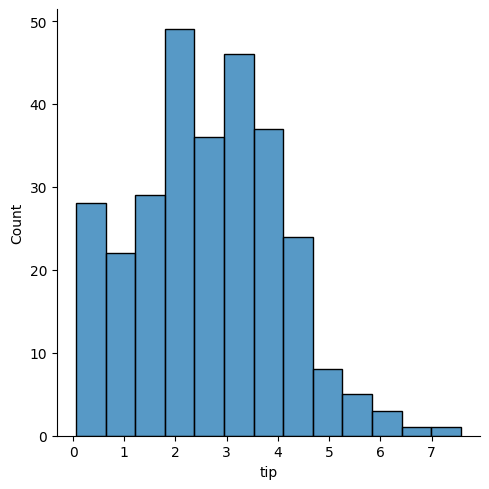

In [ ]:
# Generating a histogram to visualize tip distribution within the yellow cab data

sns.displot(data=Yellow_Cab_df, x='tip')

Visualizes the distribution of tips for yellow cabs.  
Helps to assess outliers and spread of data.

## Green Cab Tip Distribution

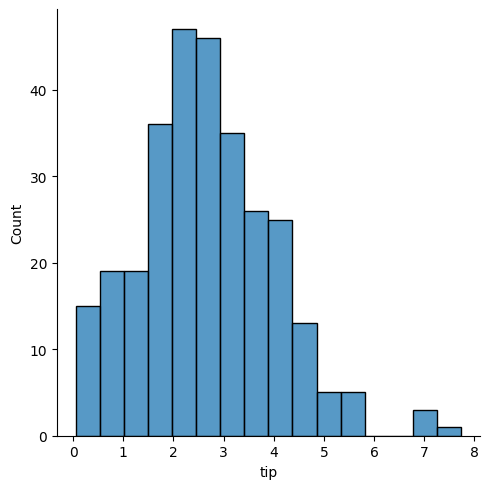

In [ ]:
# Generating a histogram to visualize the distribution of tips within the green cab data

sns.displot(data=Green_Cab_df, x='tip')

Visualizes the distribution of tips for green cabs.  
Comparison with yellow cab histogram shows difference in shape and spread.

## Test for Normality

In [ ]:
# Determining p-value of cab data

stats.normaltest(Yellow_Cab_df['tip'])        # Performing a normality test on yellow cab tips

stats.normaltest(Green_Cab_df['tip'])         # Performing a normality test on green cab tips

# Printing the test results for both cab types
print(stats.normaltest(Yellow_Cab_df['tip']))
print(stats.normaltest(Green_Cab_df['tip']))

NormaltestResult(statistic=np.float64(3.64258187700985), pvalue=np.float64(0.16181672060489052))
NormaltestResult(statistic=np.float64(18.463276952811235), pvalue=np.float64(9.789270985641703e-05))


Normality test is important because it gives an idea of what type of hypothesis test should be performed based on what is appropriate. If the p-value is greater than 0.05 then the data is normal enough. Based on the results, only the yellow cab tip data is normal enough and green cab data has a p-value less than 0.05 making the data not normal.

## Test for Equal Variance (Bartlett's)

In [ ]:
# Testing whether the tip distributions for yellow and green cabs have equal variance

stats.bartlett(Yellow_Cab_df['tip'], Green_Cab_df['tip'])

BartlettResult(statistic=np.float64(0.7714482981698573), pvalue=np.float64(0.37976938229166823))

By testing the samples for equal variance a determination can be made about the difference in variance. If the p-value is greater than 0.05 an assumption can be made that there is no difference in variance. Based on the p-value being greater than 0.05 there is no significant difference in variance.

## Two-Sample T-Test

In [ ]:
# Performing a two-sample t-test to compare mean tip amounts
# Assumes equal variance based on Bartlett’s test

stats.ttest_ind(Yellow_Cab_df['tip'], Green_Cab_df['tip'])

TtestResult(statistic=np.float64(0.04542243544132782), pvalue=np.float64(0.9637861790300399), df=np.float64(582.0))

By testing the means of the two samples the analysis shows that the p-value is greater than 0.05. Due to the results, this fails to reject the null hypothesis and there is not enough evidence to suggest that taxi cab color causes a difference in tip amount

## Summary

The analysis performed determined whether taxi cab color influences tip amounts. By inspecting datasets of green and yellow taxi cabs through data interpretation, visualization, and statistical analysis data was observed for normality, variance, and mean differences. The normality tests revealed that yellow cab tips follow a normal distribution with a p-value of 0.162 and green cab tips do not with a p-value less than 0.05. The Bartlett's test confirmed equal variance between the two groups with a p-value of 0.38. Two-sample t-test performed showed no statistical significance difference in mean tip amounts with a p-value of 0.96. Overall, the analysis fails to reject the null hypothesis and suggests that cab color does not significantly affect tip amounts. The conclusion is supported by the visualization and statistical evidence reported.